In [14]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

In [15]:
import pandas as pd
#pd.set_option('display.max_colwidth', -1)
import numpy as np

In [16]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns
sns.set(style = "whitegrid")

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score , KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler , PolynomialFeatures

#### Lectura del dataset

In [18]:
df = pd.read_csv('palermo_deptos_final.csv')
df.head(2)

,Unnamed: 0,id,superficie,cubierta,precio,piso,expensas,descripcion,ambientes,pileta,...,parrilla,balcon,cochera,geometry,dist_comisarias,dist_subte,dist_trenes,dist_metrobus,antiguedad,barrio
0,0,19,104.0,96.0,3365.384615,NaN,NaN,Excelente semipiso al contra frente en Bulnes ...,3,0,...,0,1,0,POINT (-58.4058744847 -34.580503566),719.300376,991.604946,794.459912,1500.489635,usado,Norte
1,1,209,68.0,48.0,3455.882353,NaN,NaN,"Excelente 2 Ambientes orientacion Este, Muy lu...",2,1,...,0,0,0,POINT (-58.4372870022 -34.56457657510001),980.716124,906.891789,260.100239,876.358223,estrenar,Las Cañitas


In [19]:
df = df.loc[:, ['barrio', 'antiguedad', 'superficie', 'ambientes', 'pileta', 'parrilla', 'seguridad', 'balcon',
                'cochera', 'dist_comisarias', 'dist_subte', 'dist_trenes', 'dist_metrobus', 'precio']]

### Regresión Lineal

In [20]:
class ModeloDeRegresion():
    

    kf = KFold(n_splits=5, shuffle=True, random_state=12)

    
    def __init__(self , X_train , y_train , X_test , y_test , alpha_min , alpha_max):
        
        self.X_train = X_train
        self.y_train = y_train
        self.X_test  = X_test
        self.y_test  = y_test
        self.alpha_min = alpha_min
        self.alpha_max = alpha_max
        
        self.al_lasso = np.linspace(self.alpha_min, self.alpha_max , 30)
        self.al_ridge = np.linspace(self.alpha_min, self.alpha_max , 30)  
        
  
    
    def RegresionLineal(self):
        # Training
        lm_model = LinearRegression()
        lm_model.fit(X_train , y_train)
        y_pred = lm_model.predict(X_train)
        r2_train = metrics.r2_score(y_train,y_pred)
        mse_train = metrics.mean_squared_error(y_train , y_pred)
        
        # Testing
        y_pred_test = lm_model.predict(X_test)
        r2_test = metrics.r2_score(y_test,y_pred_test)
        mse_test = metrics.mean_squared_error(y_test , y_pred_test)
        print("------ Regresion Lineal ------\n")
        print('R2 Train: {} -- R2 Test: {}'  .format(r2_train , r2_test))
        print('mse Train: {} -- mse Test: {}'  .format(mse_train , mse_test))

        print("\n")
        return y_pred , y_pred_test
        
        
    
    def Lasso(self):
        lm_LassoCV = LassoCV(alphas=self.al_lasso, cv=self.kf, normalize=False)
        lm_LassoCV.fit(X_train , y_train)
        y_pred = lm_LassoCV.predict(X_train)
        
        # Metricas
        r2_train = metrics.r2_score(y_train,y_pred)
        mse_train = metrics.mean_squared_error(y_train , y_pred)
        
        # Testing
        a = lm_LassoCV.alpha_
        lasso_final = Lasso(alpha=a)
        lasso_final.fit(X_train , y_train)
        y_pred_test = lasso_final.predict(X_test)
        r2_test = metrics.r2_score(y_test,y_pred_test)
        mse_test = metrics.mean_squared_error(y_test , y_pred_test)
        error_abs = y_train - y_pred
        
        print("------ Modelo Lasso ------\n")
        print('Alpha Lasso:',lm_LassoCV.alpha_)
        print('R2 Train: {} -- R2 Test: {}'  .format(r2_train , r2_test))
        print('mse Train: {} -- mse Test: {}'  .format(mse_train , mse_test))
        print("\n")
        
        return y_pred , y_pred_test , lm_LassoCV.intercept_ , lm_LassoCV.coef_

    
    def Ridge(self):
        
        # Training 
        
        lm_RidgeCV = RidgeCV(alphas=self.al_ridge, cv=self.kf, normalize=False)
        lm_RidgeCV.fit(X_train , y_train)
        y_pred = lm_RidgeCV.predict(X_train)
        r2_train = metrics.r2_score(y_train,y_pred)
        mse_train = metrics.mean_squared_error(y_train , y_pred)
        
        
        # Testing
        
        y_pred_test = lm_RidgeCV.predict(X_test)
        r2_test = metrics.r2_score(y_test,y_pred_test)
        mse_test = metrics.mean_squared_error(y_test , y_pred_test)
        print("------ Modelo Ridge ------\n")
        print('Alpha Ridge:',lm_RidgeCV.alpha_)
        print('R2 Train: {} -- R2 Test: {}'  .format(r2_train , r2_test))
        print('mse Train: {} -- mse Test: {}'  .format(mse_train , mse_test))
        
        return y_pred , y_pred_test

def plots():  
    fig = plt.figure(figsize=(15,8))
    
    
    ax1 = fig.add_subplot(231)
    ax1.set_title("Regresion Lineal")
    ax1.scatter(y_train , y_pred_lm);

    ax2 = fig.add_subplot(232)
    ax2.set_title("Regresion Lasso")
    ax2.scatter(y_train , y_pred_lasso);

    ax3 = fig.add_subplot(233)
    ax3.set_title("Regresion Ridge")
    ax3.scatter(y_train , y_pred_ridge);
    
    ax1.set_xlabel("Actual")
    ax2.set_xlabel("Actual")
    ax3.set_xlabel("Actual")
    ax1.set_ylabel("Predicted")
    
    ax4 = fig.add_subplot(234)
    ax4.scatter(y_pred_lm , y_train - y_pred_lm);
    
    ax5 = fig.add_subplot(235)
    ax5.scatter(y_pred_lasso , y_train - y_pred_lasso);
    
    ax6 = fig.add_subplot(236)
    ax6.scatter(y_pred_ridge , y_train - y_pred_ridge);
    
    ax4.set_xlabel("Predicted")
    ax5.set_xlabel("Predicted")
    ax6.set_xlabel("Predicted")
    ax4.set_ylabel("Residuos")

## Dataset 2
Con diferenciación de barrios y con dummies en antiguedad

In [21]:
df2 = df.loc[:, ['barrio', 'antiguedad', 'superficie', 'ambientes', 'pileta', 'parrilla', 'seguridad', 'balcon',
                'cochera', 'dist_comisarias', 'dist_subte', 'dist_trenes', 'dist_metrobus', 'precio']]

#### Agregar variables dummy - Discretización

In [22]:
barrio_dummy = pd.get_dummies(df2.barrio, drop_first=True, dtype='int')
antiguedad_dummy = pd.get_dummies((df2.antiguedad), drop_first=True, dtype='int')

In [23]:
df2 = pd.concat([df2, barrio_dummy], axis=1)
df2 = pd.concat([df2, antiguedad_dummy], axis=1)

In [24]:
df2.drop(['barrio', 'antiguedad'], axis=1, inplace=True)

In [25]:
df2.head()
df2.columns

,superficie,ambientes,pileta,parrilla,seguridad,balcon,cochera,dist_comisarias,dist_subte,dist_trenes,...,Freud,Hollywood,Las Cañitas,Norte,Nuevo,Pacifico,Soho,Zoo,pozo,usado
0,104.0,3,0,0,0,1,0,719.300376,991.604946,794.459912,...,0,0,0,1,0,0,0,0,0,1
1,68.0,2,1,0,0,0,0,980.716124,906.891789,260.100239,...,0,0,1,0,0,0,0,0,0,0
2,69.0,2,1,0,0,0,1,894.771967,791.276622,371.547893,...,0,0,1,0,0,0,0,0,0,1
3,39.0,1,0,1,1,1,0,354.987173,115.947579,1737.834489,...,0,0,0,0,0,0,0,0,0,0
4,47.0,2,0,0,0,1,0,773.123345,357.007275,326.555566,...,0,0,0,0,0,1,0,0,0,0


Index(['superficie', 'ambientes', 'pileta', 'parrilla', 'seguridad', 'balcon',
       'cochera', 'dist_comisarias', 'dist_subte', 'dist_trenes',
       'dist_metrobus', 'precio', 'Botanico', 'Chico', 'Falso Belgrano',
       'Freud', 'Hollywood', 'Las Cañitas', 'Norte', 'Nuevo', 'Pacifico',
       'Soho', 'Zoo', 'pozo', 'usado'],
      dtype='object')

------ Regresion Lineal ------

R2 Train: 0.3577842260687406 -- R2 Test: 0.3916962562494175
mse Train: 615377.5249241764 -- mse Test: 636415.1082377442


------ Modelo Lasso ------

Alpha Lasso: 2.0779310344827584
R2 Train: 0.35740294208730017 -- R2 Test: 0.3937313199272433
mse Train: 615742.8750172702 -- mse Test: 634285.9987523927


------ Modelo Ridge ------

Alpha Ridge: 20.0
R2 Train: 0.3574618966490961 -- R2 Test: 0.3929817413777218
mse Train: 615686.3841713682 -- mse Test: 635070.2173580274


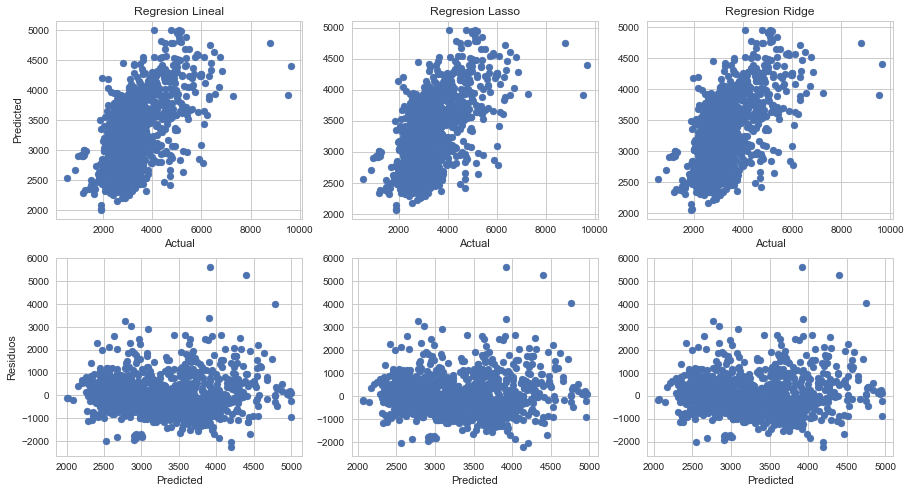

In [26]:
#Modelo 5 -- Variables Estandarizadas en dataset con discretizacion de barrios

X5 = df2[['superficie', 'ambientes', 'pileta', 'parrilla', 'seguridad', 'balcon',
       'cochera', 'dist_comisarias', 'dist_subte', 'dist_trenes',
       'dist_metrobus', 'Botanico', 'Chico', 'Falso Belgrano',
       'Freud', 'Hollywood', 'Las Cañitas', 'Norte', 'Nuevo', 'Pacifico',
       'Soho', 'Zoo', 'pozo', 'usado']]
y5 = df2.precio

se = StandardScaler()

X5 = se.fit_transform(X5)


X_train, X_test, y_train, y_test = train_test_split(X5, y5, random_state=123)

ml5 = ModeloDeRegresion(X_train , y_train , X_test , y_test , 0.01 , 20)


y_pred_lm , y_pred_test_lm = ml5.RegresionLineal()
y_pred_lasso , y_pred_test_lasso , intercepto , coeffs = ml5.Lasso()
y_pred_ridge , y_pred_test_ridge = ml5.Ridge()

plots()

------ Regresion Lineal ------

R2 Train: 0.9860329216787125 -- R2 Test: -3.990154987390097e+17
mse Train: 13383.392991365605 -- mse Test: 4.174550862580996e+23


------ Modelo Lasso ------

Alpha Lasso: 12.24137931034483
R2 Train: 0.5803989270390189 -- R2 Test: 0.5008369755869908
mse Train: 402065.9102681828 -- mse Test: 522230.70049086935


------ Modelo Ridge ------

Alpha Ridge: 20.0
R2 Train: 0.7937867660876132 -- R2 Test: 0.38430770707860673
mse Train: 197595.56622973524 -- mse Test: 644145.1022885279


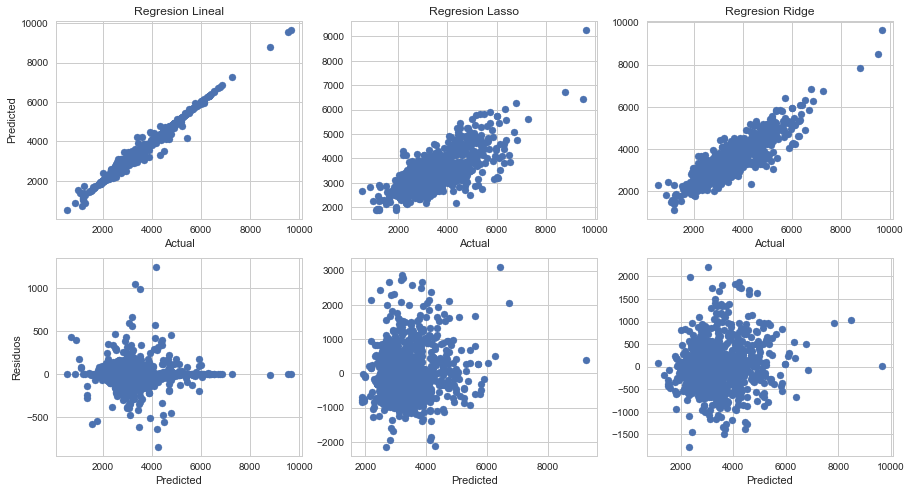

In [27]:
#Modelo 6 -- Modelo de Grado 3.

X6 = df2[['superficie', 'ambientes', 'pileta', 'parrilla', 'seguridad', 'balcon',
       'cochera', 'dist_comisarias', 'dist_subte', 'dist_trenes',
       'dist_metrobus', 'Botanico', 'Chico', 'Falso Belgrano',
       'Freud', 'Hollywood', 'Las Cañitas', 'Norte', 'Nuevo', 'Pacifico',
       'Soho', 'Zoo', 'pozo', 'usado']]

y6 = df2.precio

# Creo un polinomio de grado 3 y transformo el data set
poly = PolynomialFeatures(degree=3)
se = StandardScaler()

X6 = poly.fit_transform(X6)
X6 = se.fit_transform(X6)


X_train, X_test, y_train, y_test = train_test_split(X6, y6, random_state=123)

ml6 = ModeloDeRegresion(X_train , y_train , X_test , y_test , 5 , 20)


y_pred_lm , y_pred_test_lm = ml6.RegresionLineal()
y_pred_lasso , y_pred_test_lasso , intercepto , coeffs = ml6.Lasso()
y_pred_ridge , y_pred_test_ridge = ml6.Ridge()


plots()

In [37]:
lista_coeffs = list(zip(coeffs, poly.get_feature_names()))
lista_coeffs_df = pd.DataFrame(lista_coeffs)